## **Objective: Forest vs Building Classification Using ANN**

Steps:
1. Importing (or installing) Tenosrflow, Keras and other packages on your system
2. Loading your data from disk
3. Creating your training and testing splits
4. Data Preprocessing
5. Defining your tensorflow ANN model architecture
6. Compiling your tensorflow ANN model
7. Training your model on your training data
8. Evaluating your model on your test data
9. Generate Plots for accuracy and validation loss
10. Saving The train model
11. Making predictions using your trained tensorflow model

### Step 1:Importing all the packages

In [1]:
# Import libraries and packages

import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
import time # time1 = time.time(); print('Time taken: {:.1f} seconds'.format(time.time() - time1))
import warnings
from tqdm import tqdm_notebook as tqdm
import itertools


warnings.filterwarnings("ignore")
SEED = 42 # set random seed

### Step 2:Loading your data from disk for training

In [3]:
# mountgoogle drive to collab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# change working DIR
import os
os.chdir('/content/drive/MyDrive/Deep Learning/Image Classification using ANN')

In [5]:
### Extrct dataset.rar file
# !pip install patool
# import patoolib
# patoolib.extract_archive("dataset.rar")
# patoolib.extract_archive("test_examples.rar")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.5/86.5 kB 2.6 MB/s eta 0:00:00


INFO patool: Extracting dataset.rar ...
INFO:patool:Extracting dataset.rar ...
INFO patool: running /usr/bin/unrar x -kb -or -- "/content/drive/MyDrive/Deep Learning/Image Classification using ANN/dataset.rar"
INFO:patool:running /usr/bin/unrar x -kb -or -- "/content/drive/MyDrive/Deep Learning/Image Classification using ANN/dataset.rar"
INFO patool: ... dataset.rar extracted to `dataset1' (local file exists).
INFO:patool:... dataset.rar extracted to `dataset1' (local file exists).
INFO patool: Extracting test_examples.rar ...
INFO:patool:Extracting test_examples.rar ...
INFO patool: running /usr/bin/unrar x -kb -or -- "/content/drive/MyDrive/Deep Learning/Image Classification using ANN/test_examples.rar"
INFO:patool:running /usr/bin/unrar x -kb -or -- "/content/drive/MyDrive/Deep Learning/Image Classification using ANN/test_examples.rar"
INFO patool: ... test_examples.rar extracted to `test_examples1' (local file exists).
INFO:patool:... test_examples.rar extracted to `test_examples1'

'test_examples1'

In [6]:
# initialize the data and labels
print("[INFO] loading images...")
time1 = time.time() # to measure time taken
data = [] # x
labels = [] # Y
classes = ["Forest", "Buildings"]

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images("dataset"))) # data folder with 2 categorical folders
random.seed(SEED)
random.shuffle(imagePaths)

# progress bar
with tqdm(total=len(imagePaths)) as pbar:

  # loop over the input images
  for imagePath in imagePaths:
    # load the image, resize the image to be 32*32 pixels (ignoring aspect ratio),
    # flatten the 32*32*3=3072 pixel image into a list, and store the image in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image)

    # Extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]

    label = 1 if label == "Buildings" else 0
    labels.append(label)

    # update the progresbar
    pbar.update(1)

# Scale the raw pixel intensities to the range [0,1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print("Time taken: {:.1f} seconds".format(time.time() - time1))    # to measure time taken
print("done")

[INFO] loading images...


  0%|          | 0/883 [00:00<?, ?it/s]

Time taken: 117.2 seconds
done


In [ ]:
import pandas as pd
df = pd.DataFrame(data)
df["Label"] = labels

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,Label
0,0.317647,0.298039,0.286275,0.360784,0.321569,0.321569,0.090196,0.086275,0.082353,0.105882,...,0.698039,0.556863,0.431373,0.803922,0.654902,0.521569,0.741176,0.588235,0.462745,0
1,0.466667,0.380392,0.031373,0.517647,0.454902,0.019608,0.105882,0.039216,0.003922,0.117647,...,0.525490,0.482353,0.011765,0.494118,0.482353,0.007843,0.513725,0.513725,0.094118,1
2,0.533333,0.956863,0.874510,0.800000,0.952941,0.854902,0.164706,0.568627,0.380392,0.345098,...,0.192157,0.333333,0.380392,0.262745,0.372549,0.458824,0.058824,0.180392,0.231373,0
3,0.203922,0.172549,0.094118,0.137255,0.137255,0.070588,0.282353,0.215686,0.054902,0.580392,...,0.172549,0.356863,0.129412,0.164706,0.337255,0.145098,0.172549,0.364706,0.188235,0
4,0.062745,0.101961,0.109804,0.062745,0.109804,0.113725,0.031373,0.078431,0.094118,0.015686,...,0.101961,0.603922,0.325490,0.043137,0.396078,0.145098,0.047059,0.435294,0.227451,0


In [ ]:
print("Total Images:", len(data))

Total Images: 883


In [ ]:
# sample data for first image
print("sample image: {}".format(data[0]))
print("no of features/pixels values: {}".format(len(data[0]))) #32*32*3=3072
print("label: {}".format(classes[labels[0]]))

sample image: [0.31764706 0.29803922 0.28627451 ... 0.74117647 0.58823529 0.4627451 ]
no of features/pixels values: 3072
label: Forest


In [ ]:
128 * 128 * 3

49152

In [ ]:
32 * 32 * 3 * 883

2712576

### Step 3: Creating your training and testing splits

In [7]:
# partition the data into 80% training and 20% validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=SEED)

In [8]:
trainX.shape

(706, 3072)

In [9]:
trainY.shape

(706,)

In [10]:
testX.shape

(177, 3072)

In [11]:
testY.shape

(177,)

In [12]:
trainX

array([[0.20392157, 0.57254902, 0.34509804, ..., 0.00784314, 0.17254902,
        0.07843137],
       [0.85490196, 0.87843137, 0.95686275, ..., 0.        , 0.        ,
        0.01176471],
       [0.76862745, 0.77254902, 0.78039216, ..., 0.44313725, 0.46666667,
        0.48627451],
       ...,
       [0.88235294, 0.87058824, 0.80392157, ..., 0.21960784, 0.19215686,
        0.23137255],
       [0.84313725, 0.78823529, 0.79215686, ..., 0.3372549 , 0.36862745,
        0.62745098],
       [0.02352941, 0.35686275, 0.17254902, ..., 0.09411765, 0.28627451,
        0.21568627]])

In [13]:
trainY

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

### Build ML Model

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(trainX, trainY)

pred = lr.predict(testX)
print(confusion_matrix(testY, pred))
print(classification_report(testY, pred))
print(accuracy_score(testY, pred))

[[73  9]
 [18 77]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        82
           1       0.90      0.81      0.85        95

    accuracy                           0.85       177
   macro avg       0.85      0.85      0.85       177
weighted avg       0.85      0.85      0.85       177

0.847457627118644


### Step 4: Data Preprocessing

In [19]:
# convert the labels from integers/categories to vectors

trainY = to_categorical(trainY, num_classes=2)  # fit_transform = find all unique class labels + train
testY = to_categorical(testY, num_classes=2)    # transform = perform the one-hot encoding (unique)

# [0,1] Buildings
# [1,0] Forest

In [20]:
#testY

In [21]:
trainY

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [22]:
sample_image = (trainX[25] * 255).astype("int")

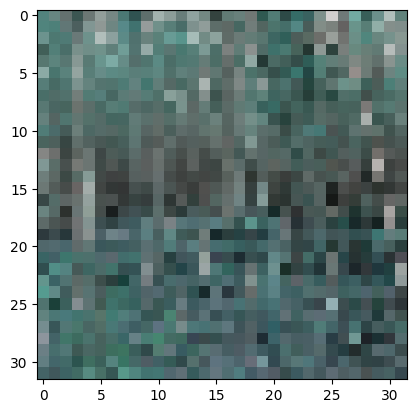

In [23]:
plt.imshow(sample_image.reshape(32,32,3))

In [24]:
trainY[25]  # [0,1] means buildings [1,0] means forest

array([1., 0.])

### Step 5:Define the architecture for ANN MODEL

In [39]:
# define the 3072-1024-512-1 architecture using Keras
model = Sequential()
# input layer 3072 as there are 32*32*3=3072 pixels in a flattened input image
# first hidden layer has 1024 nodes
model.add(Dense(units=1024, input_shape=(3072,), kernel_initializer = "uniform", activation="relu"))

# # dropout for second layer
model.add(Dropout(0.4))

# second hidden layer has 512 nodes
model.add(Dense(units=512, kernel_initializer = "uniform", activation="relu"))

# output layer with number of possible class labels
model.add(Dense(units=2, kernel_initializer = "uniform", activation="softmax"))

### Step 6: Compiling your tensorflow ANN model

In [40]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS = 50
# compile the model using SGD as our optimizer and categorical cross-entropy loss
# (you'll want to use binary_crossentropy for 2-class classification)
print("[INFO] compiling network network...")
opt = SGD(learning_rate=INIT_LR)  # Stochastic Gradient Descent (SGD) optimizer
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling network network...


In [41]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,672,578 (14.01 MB)

 Trainable params: 3,672,578 (14.01 MB)

 Non-trainable params: 0 (0.00 B)

### Step 7: Training your model on training data

### Fit model

In [42]:
# train the neural network on training data set
# batch_size (32) controls the size of each group of data to pass through the network.

H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)

model.save("ANN_MODEL_{}.h5".format(EPOCHS))

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5305 - loss: 0.6760 - val_accuracy: 0.6045 - val_loss: 0.6580
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5607 - loss: 0.6493 - val_accuracy: 0.5367 - val_loss: 0.6249
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5665 - loss: 0.6295 - val_accuracy: 0.5367 - val_loss: 0.6065
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5847 - loss: 0.6023 - val_accuracy: 0.6667 - val_loss: 0.5764
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6364 - loss: 0.5898 - val_accuracy: 0.7062 - val_loss: 0.5541
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6831 - loss: 0.5497 - val_accuracy: 0.6158 - val_loss: 0.5559
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6923 - loss: 0.5365 - val_accuracy: 0.7232 - val_loss: 0.5143
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7412 - loss: 0.5301 - val_accuracy: 0.7966 - v

### Step 9: Generate PLots for acc and val

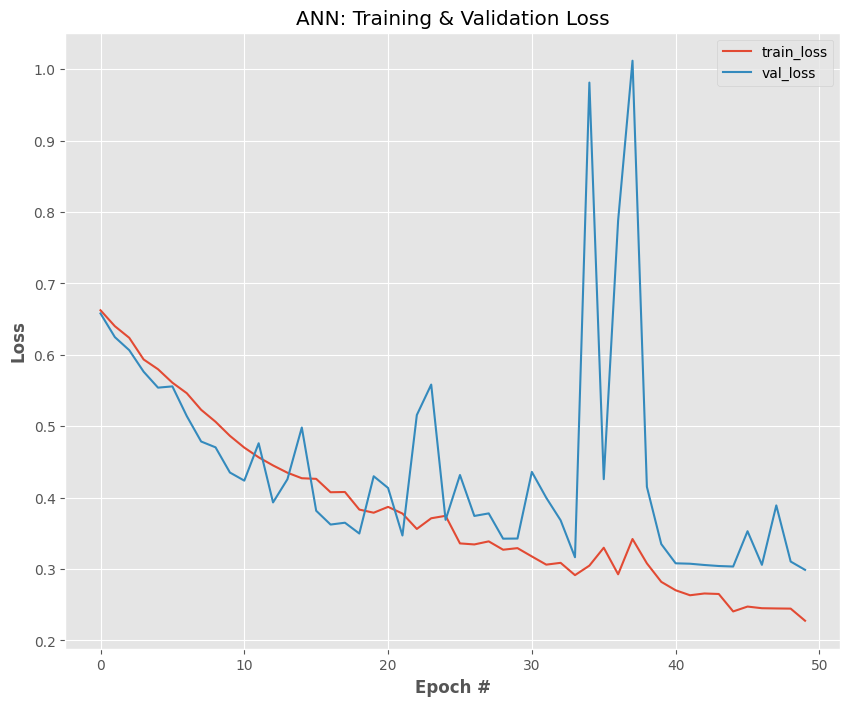

In [43]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("ANN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

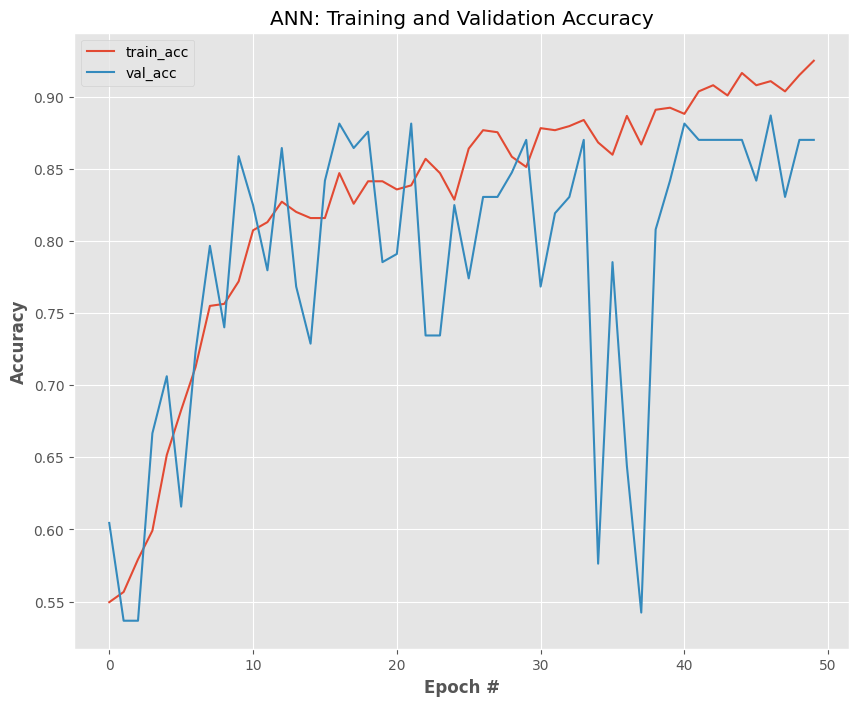

In [44]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("ANN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

In [45]:
# Evaluate on test data
loss, accuracy = model.evaluate(testX, testY)
print(f"Accuracy: {accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8602 - loss: 0.2816
Accuracy: 87.01%


# Dropout :--
*Dropout* is a regularization technique used in neural networks to prevent overfitting, which occurs when a model performs well on training data but poorly on new, unseen data. During training, dropout randomly deactivates (or "drops out") a fraction of neurons in a given layer for each forward and backward pass. This means that, in each training iteration, the network is effectively a slightly different, smaller network

Imagine a student who, when faced with a problem, keeps rehashing the same solution method over and over, becoming stuck and anxious—this is like overthinking. If a teacher occasionally asks the student to try a different method or take a break from their usual approach, the student is forced to develop new strategies and become more adaptable. Dropout plays a similar role in neural networks, encouraging the system to diversify its strategies and avoid the “rut” of overfitting.

### Step 11: Making predication on your tensorflow model

In [49]:
import imutils

In [50]:
def display_img(img):
  fig = plt.figure(figsize=(12,10))
  # plt.grid(b=None)
  ax = fig.add_subplot(111)
  ax.imshow(img)

In [51]:
# load the input image and resize it to the target spatial dimensions
width = 32
height = 32
# grab the image paths and randomly shuffle then
testImagePaths = sorted(list(paths.list_images('test_examples')))   # test data folder with random images

# progress bar
with tqdm(total=len(testImagePaths)) as pbar:
  for imagePath in testImagePaths:
    image = cv2.imread(imagePath)
    output = image.copy()
    image = cv2.resize(image, (width,height))
    # scale the pixel values to [0,1]
    image = image.astype("float") / 255.0
    # for a simple fully-connected network, flatten the image
    image = image.flatten()
    image = image.reshape((1, image.shape[0]))
    # make a prediction on the image
    preds = model.predict(image)
    # find the class label index with the largest corresponding probability
    i = preds.argmax(axis=1)[0]
    label = classes[i]
    label = "{}: {:.2f}%".format(label, preds[0][i] * 100)
    output = imutils.resize(output, width=400)
    cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Convert img to rgb format and display in notebook
    img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    display_img(img)
    pbar.update(1)

Output hidden; open in https://colab.research.google.com to view.

### Deployment

In [52]:
!pip install gradio

In [53]:
import gradio as gr

In [57]:
def predict_image(image):

  image = cv2.resize(image, (32,32))

  #scale the pixel values to [0, 1]
  image = image.astype("float") / 255.0

  # for a simple fully-connected network, flatten the image
  image = image.flatten()
  image = image.reshape((1, image.shape[0]))

  # make a predication on the image
  preds =model.predict(image).flatten()
  result = dict()
  result["Forest"] = round(float(list(preds)[0]), 3)
  result["Buildings"] = round(float(list(preds)[1]), 3)
  print(result)

  return result

im = gr.Image()
label = gr.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=im, outputs=label, title="ANN Demo").launch(share=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>